# Parameter Estimation in the Multivariate Skew-Normal Distribution

Let $\boldsymbol{X}$ be $p$-variate skew-normal distributed, $\boldsymbol{X}\sim SN_p(\boldsymbol{\mu}, \boldsymbol{\Sigma}, \boldsymbol{\lambda})$, for $\boldsymbol{\mu}, \boldsymbol{\lambda}\in\mathbb{R}^d$ and $\boldsymbol{\Sigma}\in\mathbb{R}^{d\times d}$. Then the multivariate density is given by

$$f(\boldsymbol{x}) = 2\phi_p\left(x; \boldsymbol{\mu}, \boldsymbol{\Sigma}\right)\Phi_1\left(\boldsymbol{\lambda}^T\boldsymbol{\Sigma}^{-1/2}(x-\boldsymbol{\mu}); 0, 1\right).$$

To get the $(\boldsymbol{\Omega}, \boldsymbol{\alpha})$ parameterisation used in Azzalini & Capitanio (1999), let $\boldsymbol{\Omega}:=\boldsymbol{\Sigma}$ and $\boldsymbol{\alpha}:=\boldsymbol{\Sigma}^{-1/2}\boldsymbol{\lambda}$. We follow the modified EM algorithm as specified in Fujisawa & Kawashima (2019).

<br/>

Abe, T., Fujisawa, H., and Kawashima, T. (2019) *EM algorithm using overparametrization for multivariate skew-normal distribution, in preparation.*

Azzalini, A., & Capitanio, A. (1999). Statistical applications of the multivariate skew normal distribution. *Journal of the Royal Statistical Society: Series B (Statistical Methodology), 61(3)*, 579–602.


Fitted location: [-1.0079634  0.1662476]
Fitted shape:

[[ 1.00562746 -0.40952524]
 [-0.40952524  0.96767592]]

Fitted skewness: [ 4.07254688 -0.85065189]


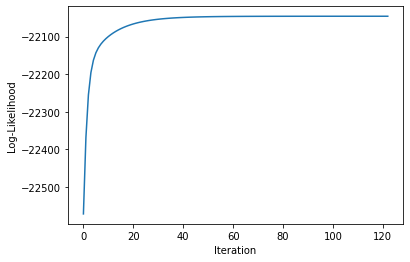

In [1]:
import sys
sys.path.append("../")
from mvem import multivariate_skewnorm
import matplotlib.pyplot as plt
import numpy as np

# set true location, shape, and skewness
mu = [-1, .2]
sigma = [[1., -.45], [-0.45, 1.]]
lmbda = [4, -1]

# alpha parameter in Azzalini & Capitanio (1999)
#val, vec = np.linalg.eig(sigma)
#cov_half = vec @ np.diag(val**(-1/2)) @ vec.T
#alpha = cov_half @ lmbda

# sample from the postulated distribution
x = multivariate_skewnorm.rvs(mu, sigma, lmbda, 10000)

# estimate parameters using EM algorithm
mu_fit, sigma_fit, lmbda_fit, loglike = multivariate_skewnorm.fit(x, 200, ftol=1e-8)

# print
print("\nFitted location: " + str(mu_fit))
print("Fitted shape:\n"); print(str(sigma_fit))
print("\nFitted skewness: " + str(lmbda_fit))

# plot log-likelihood
plt.plot(loglike)
plt.ylabel("Log-Likelihood")
plt.xlabel("Iteration")
plt.show()

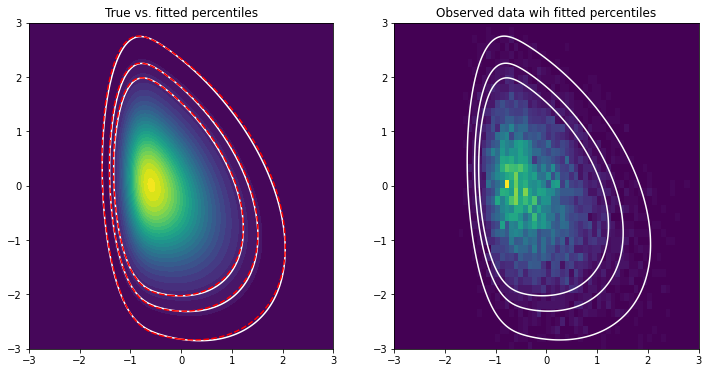

In [2]:
from matplotlib import cm
from scipy import interpolate

# pdf positions
xx   = np.linspace(-3, 3, 300)
yy   = np.linspace(-3, 3, 300)
X, Y = np.meshgrid(xx, yy)
pos  = np.dstack((X, Y))

# density ... and estimate 99, 95 and 90 % percentiles
Z = multivariate_skewnorm.pdf(pos, mu_fit, sigma_fit, lmbda_fit)
Z = Z / Z.sum()
n = 1000
t = np.linspace(0, Z.max(), n)
integral = ((Z >= t[:, None, None]) * Z).sum(axis=(1,2))
f = interpolate.interp1d(integral, t)
t_contours = f(np.array([0.99, 0.95, 0.90]))

# ... for true pdf
Z_true = multivariate_skewnorm.pdf(pos, mu, sigma, lmbda)
Z_true = Z_true / Z_true.sum()
n = 1000
t = np.linspace(0, Z_true.max(), n)
integral = ((Z_true >= t[:, None, None]) * Z_true).sum(axis=(1,2))
f = interpolate.interp1d(integral, t)
t_contours_true = f(np.array([0.99, 0.95, 0.90]))

# plot
fig, ax = plt.subplots(1, 2, figsize = (12, 6))
ax[0].contourf(X,Y,Z_true, 25)
ax[0].contour(X,Y,Z_true, t_contours_true, colors="white")
ax[0].contour(X,Y,Z, t_contours, colors="red", linestyles="--")
ax[0].set_xlim([-3,3])
ax[0].set_ylim([-3,3])
ax[0].set_title("True vs. fitted percentiles")

ax[1].hist2d(x[:,0], x[:,1], bins = 50)
ax[1].set_facecolor("#440154FF")
ax[1].contour(X,Y,Z, t_contours, colors="white")
ax[1].set_xlim([-3,3])
ax[1].set_ylim([-3,3])
ax[1].set_title("Observed data wih fitted percentiles")
plt.show()